## Loan credit default  Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('credit_risk.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


#### person_age: age of a person in years
#### person_income: income of a person
#### person_home_ownership: home ownership- rent, own , mortgage
#### person_emp_length: person's employement lenght
#### loan_intent: type of loan 
#### loan_grade: loan grade- A,B,C,D,E,F,G
#### loan_amount: amount of loan taken
#### loan_int_rate: loan interest rate
#### loan_status: active or not
#### loan_ percent_income: income percentage as per loan amount
#### cb_person_default_on_file: loan defaulter or not- Y,N

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Categorical data : person_home_ownership, loan_intent, loan_grade, cb_person_default_on_file
### Numerical data : person_age, person_income, person_emp_length, loan_amnt, loan_int_rate, loan_status

## Descriptive Analysis

In [5]:
df.shape

(32581, 12)

In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
df['person_age'].sort_values()

1313      20
12943     20
14827     20
15830     20
11902     20
        ... 
575      123
747      123
81       144
183      144
32297    144
Name: person_age, Length: 32581, dtype: int64

In [8]:
df['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [9]:
df['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

In [10]:
df['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [11]:
df['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [12]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [13]:
df['cb_person_cred_hist_length'].value_counts()

2     5965
3     5943
4     5925
8     1902
7     1901
9     1895
5     1881
6     1857
10    1850
14     492
12     485
11     463
16     451
13     443
15     437
17     407
20      31
24      30
28      27
27      22
22      22
23      22
30      22
19      21
21      20
18      19
25      18
26      16
29      14
Name: cb_person_cred_hist_length, dtype: int64

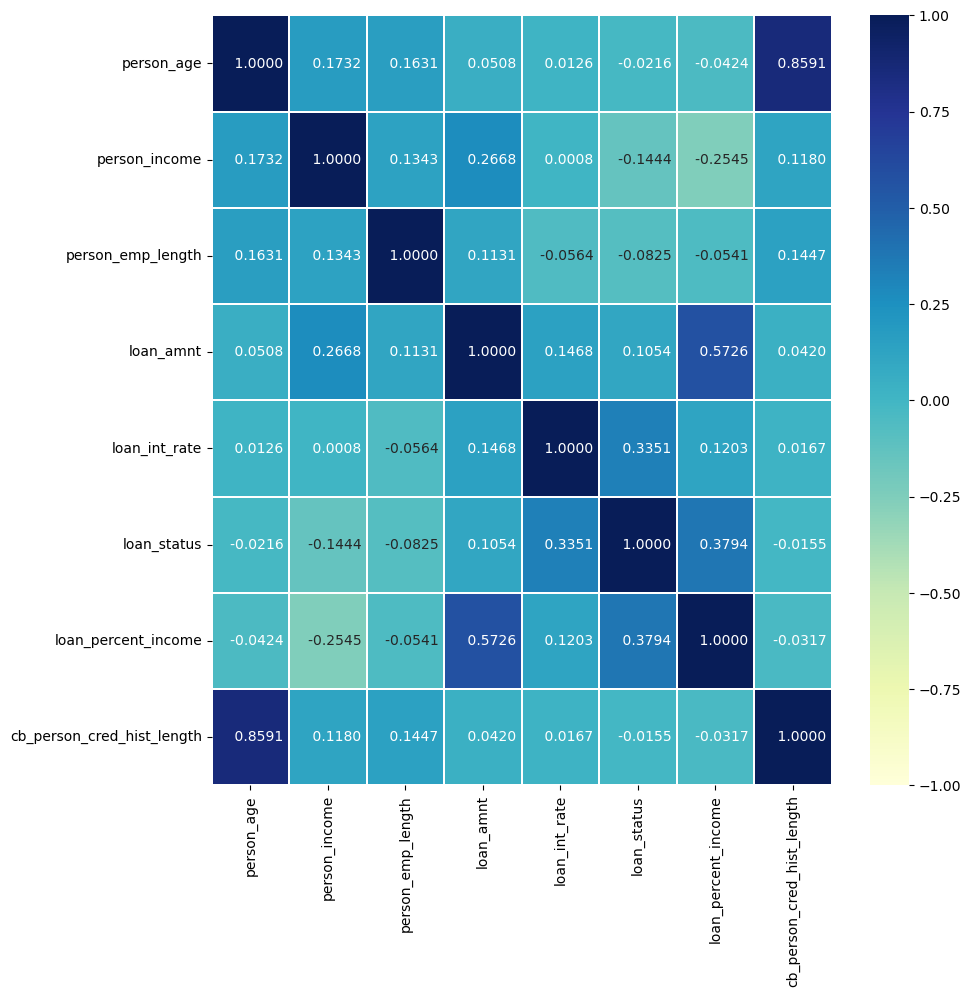

In [14]:
fig,ax = plt.subplots(figsize=(10, 10))

# plot a heatmap for the correlation matrix
# annot: print values in each cell
# linewidths: specify width of the line specifying the plot
# vmin: minimum value of the variable
# vmax: maximum value of the variable
# cmap: colour code of the plot
# fmt: set the decimal place of annot
sns.heatmap(df.corr(), annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "YlGnBu" , fmt = '10.4f')

# display the plot
plt.show()

### Data is moderately correlated.

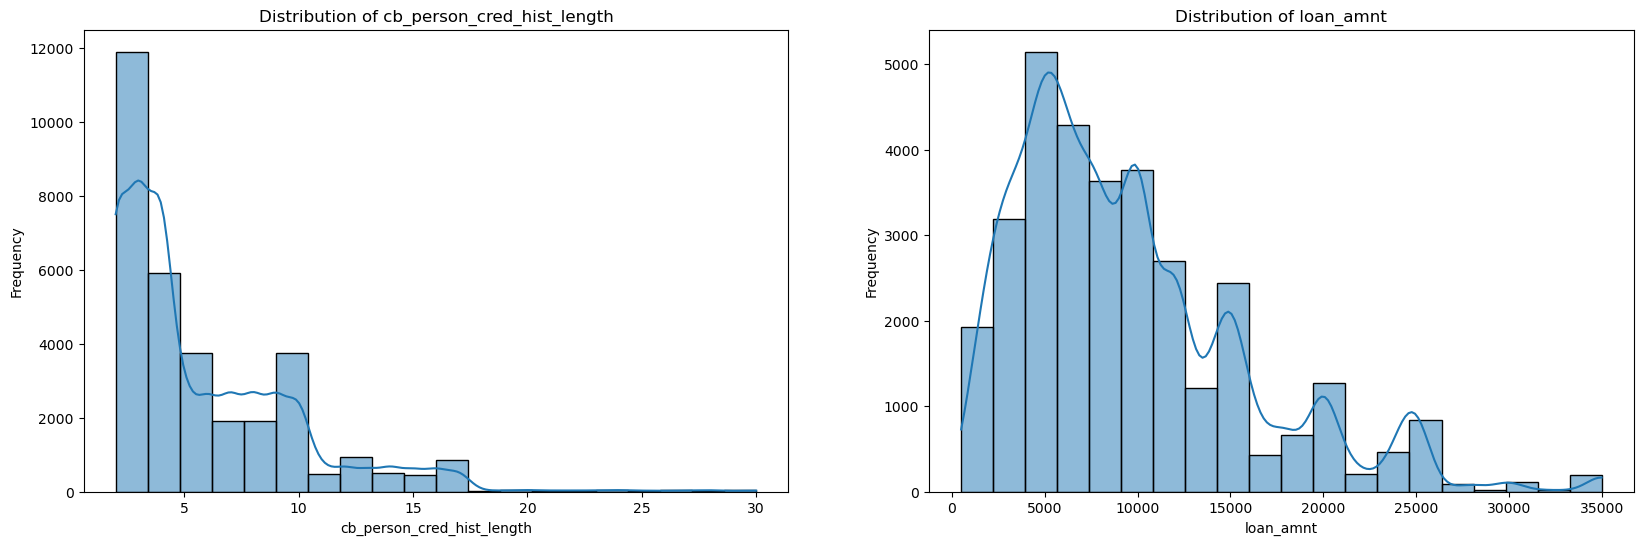

In [15]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(df['cb_person_cred_hist_length'], bins=20, kde=True)
plt.title('Distribution of cb_person_cred_hist_length')
plt.xlabel('cb_person_cred_hist_length')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df['loan_amnt'], bins=20, kde=True)
plt.title('Distribution of loan_amnt')
plt.xlabel('loan_amnt')
plt.ylabel('Frequency')

plt.show()

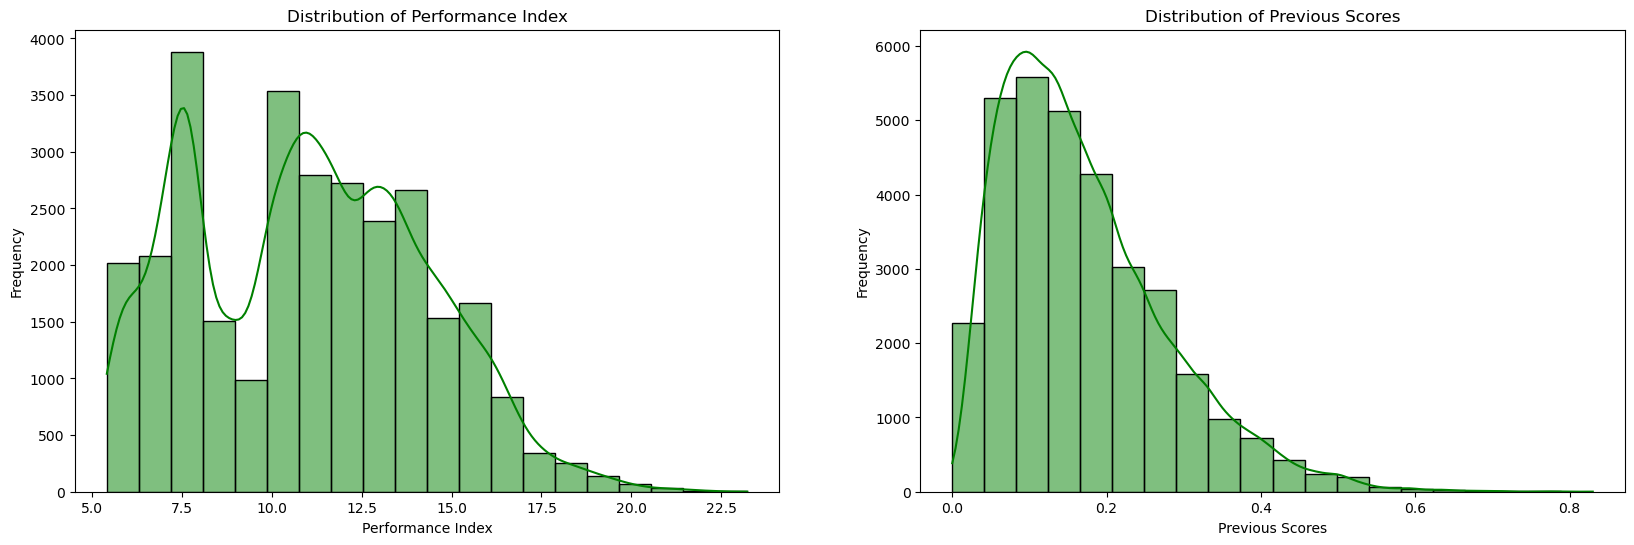

In [16]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(df['loan_int_rate'], bins=20, kde=True,color='green')
plt.title('Distribution of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df['loan_percent_income'], bins=20, kde=True,color='green')
plt.title('Distribution of Previous Scores')
plt.xlabel('Previous Scores')
plt.ylabel('Frequency')

plt.show()

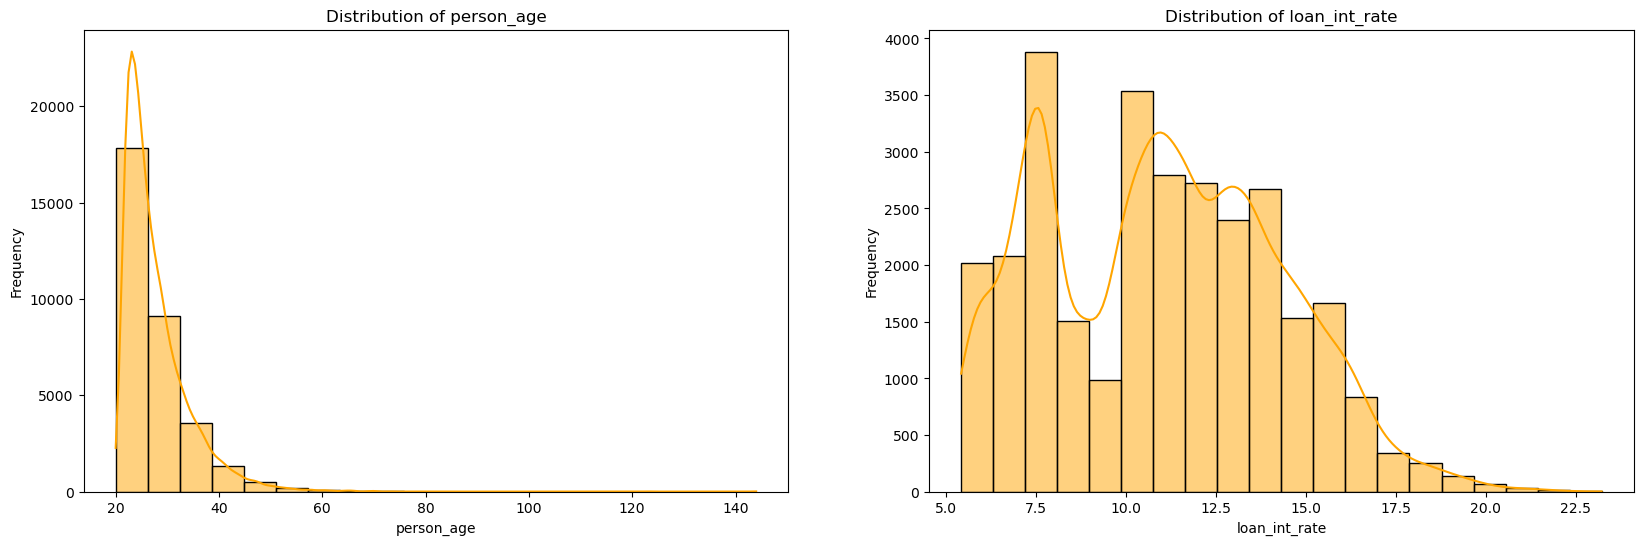

In [17]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(df['person_age'], bins=20, kde=True,color='orange')
plt.title('Distribution of person_age')
plt.xlabel('person_age')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df['loan_int_rate'], bins=20, kde=True,color='orange')
plt.title('Distribution of loan_int_rate')
plt.xlabel('loan_int_rate')
plt.ylabel('Frequency')

plt.show()

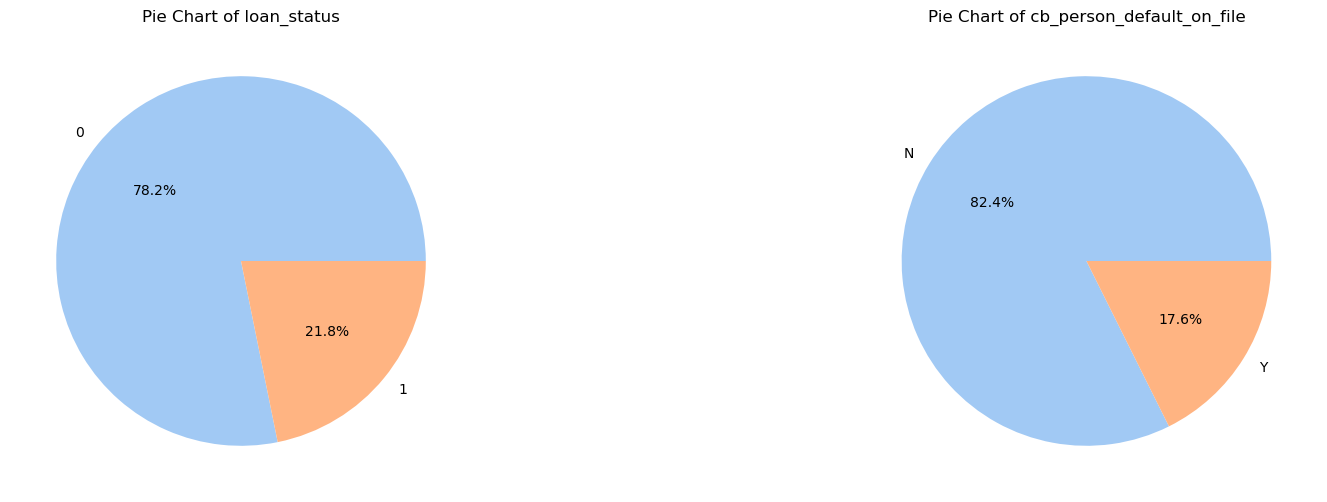

In [18]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
df['loan_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of loan_status')
plt.ylabel('')

plt.subplot(1,2,2)
df['cb_person_default_on_file'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of cb_person_default_on_file')
plt.ylabel('')

plt.show()

In [19]:
category = df[['person_home_ownership', 'loan_grade', 'cb_person_default_on_file', 'loan_intent']]

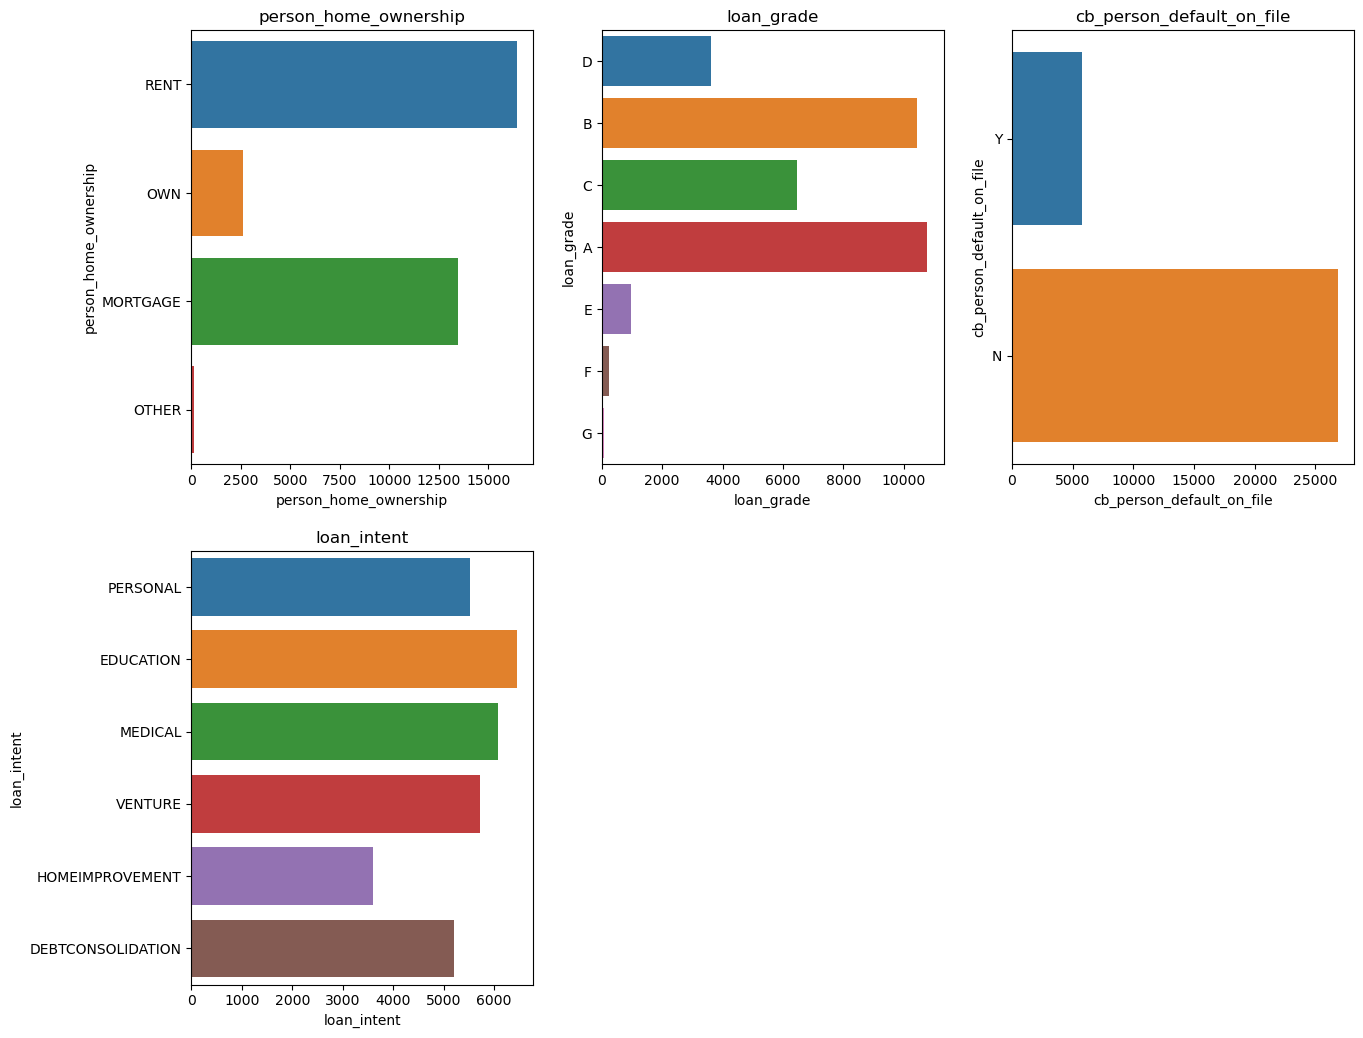

In [20]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in category:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

### Inferences

#### 1. Most of the person who has taken loan is either rent a house or has house on mortgage.
#### 2. loan grade A and loan grade B has the maximum count followed by loan grade C and D.
#### 3. in our data set aorund 5000 person are loan defaulters.
#### 4. most frequent taken loan is Education , medical ,Venture and personal.

### person's age analysis

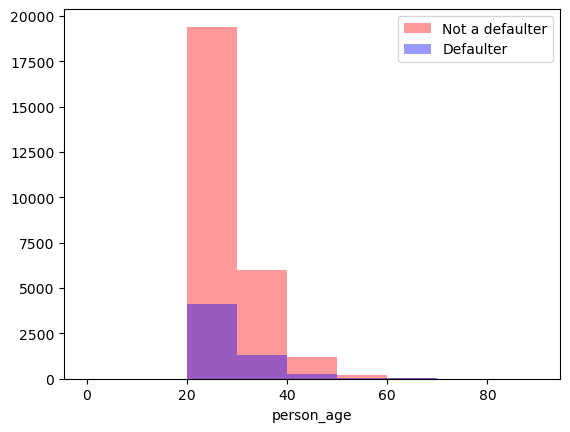

In [21]:
bins = range(0, 100, 10)
ax = sns.distplot(df.person_age[df.cb_person_default_on_file=='N'],
              color='red', kde=False, bins=bins, label="Not a defaulter")
sns.distplot(df.person_age[df.cb_person_default_on_file=='Y'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Defaulter")
plt.legend()
plt.show()

#### Age lies mostly between 20 to 60. Where age group 20-40 has more number of defaulters present.

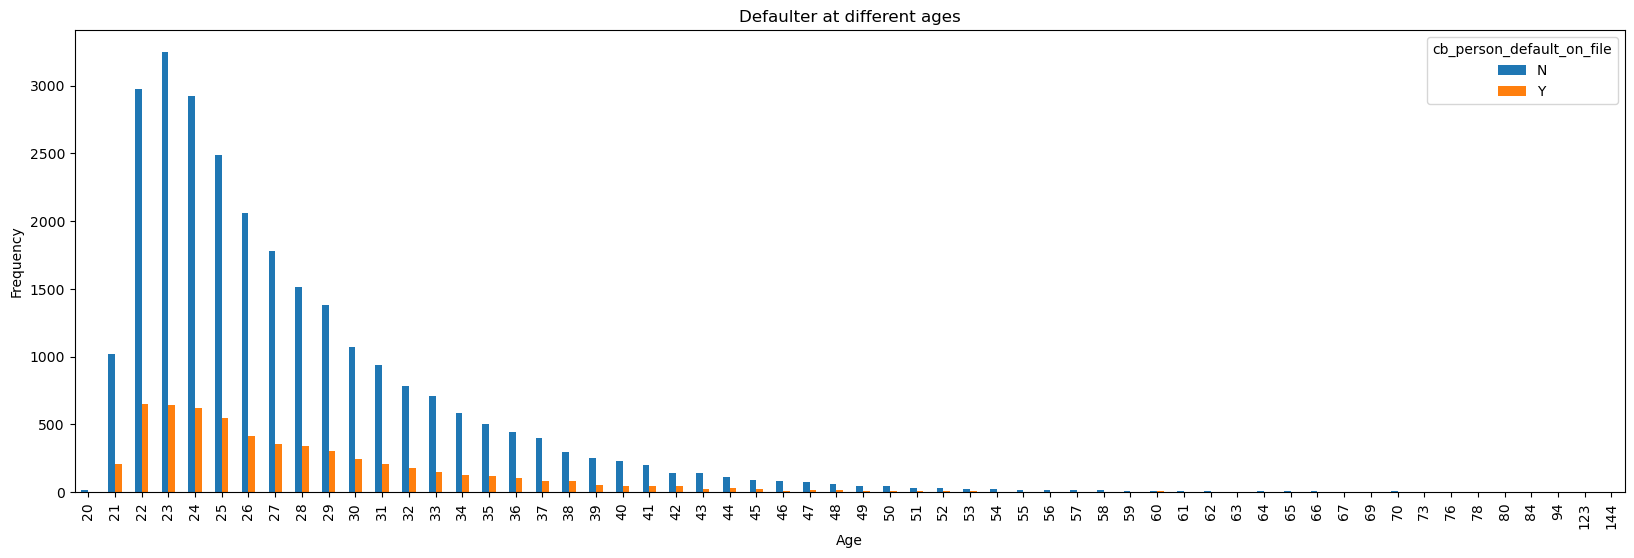

In [22]:
pd.crosstab(df.person_age,df.cb_person_default_on_file).plot(kind="bar",figsize=(20,6))
plt.title('Defaulter at different ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

####  The above graph shows the variation in age with defaulter or not.

#### Outlier detection

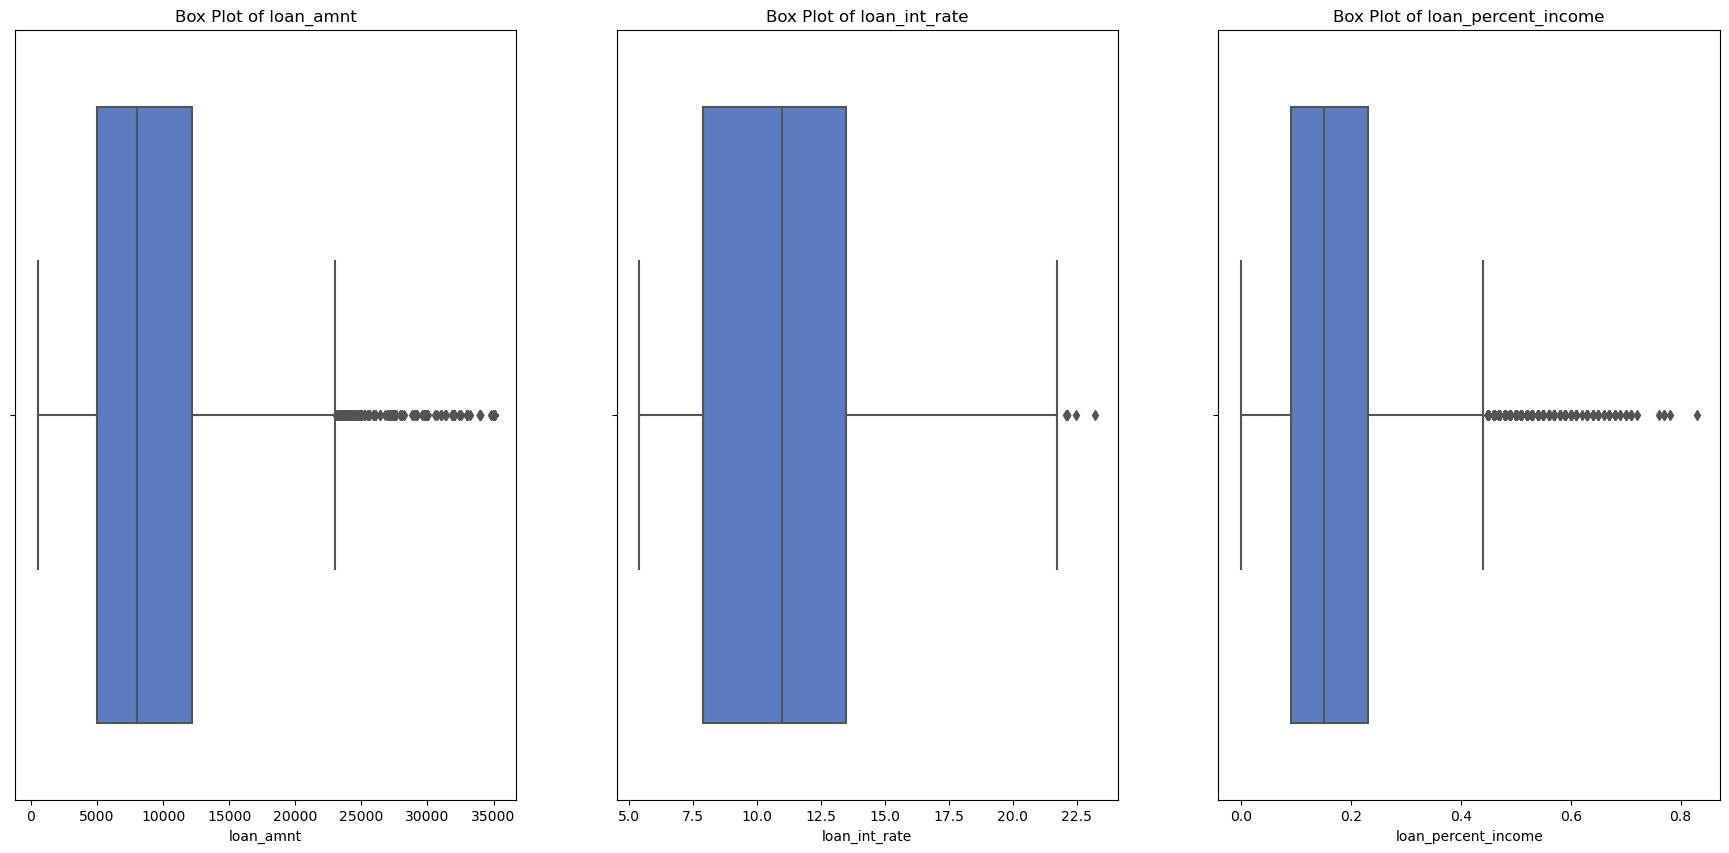

In [23]:
plt.figure(figsize=(22, 10))

plt.subplot(1,3,1)
sns.boxplot(x=df['loan_amnt'],palette = ("muted"))
plt.title('Box Plot of loan_amnt')
plt.xlabel('loan_amnt')

plt.subplot(1,3,2)
sns.boxplot(x=df['loan_int_rate'] ,palette = ("muted"))
plt.title('Box Plot of loan_int_rate')
plt.xlabel('loan_int_rate')

plt.subplot(1,3,3)
sns.boxplot(x=df['loan_percent_income'],palette = ("muted"))
plt.title('Box Plot of loan_percent_income')
plt.xlabel('loan_percent_income')

plt.show()

#### Box plot for loan_amnt shows there are some outliers present at the right side,
#### Box plot for loan_int_rate shows there are very few outliers present at the right side,
#### Box plot for loan_percent_income shows there are some outliers present at the right side.

### Data pre processing

In [24]:
df= df.dropna()

In [25]:
df.shape

(28638, 12)

In [26]:
df = df.drop_duplicates()

In [27]:
df.shape

(28501, 12)

In [28]:
# dropping less important column.

In [29]:
df = df.drop(columns=['cb_person_cred_hist_length'])

In [30]:
df_num = df.select_dtypes(include='number')

In [31]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)

# calculate of interquartile range 
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#### Removing Outliers - As there are sufficient number of rows in the dataset (32581) we can remove the outliers, it won't affect the model much.

In [32]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [33]:
df.shape

(19019, 11)

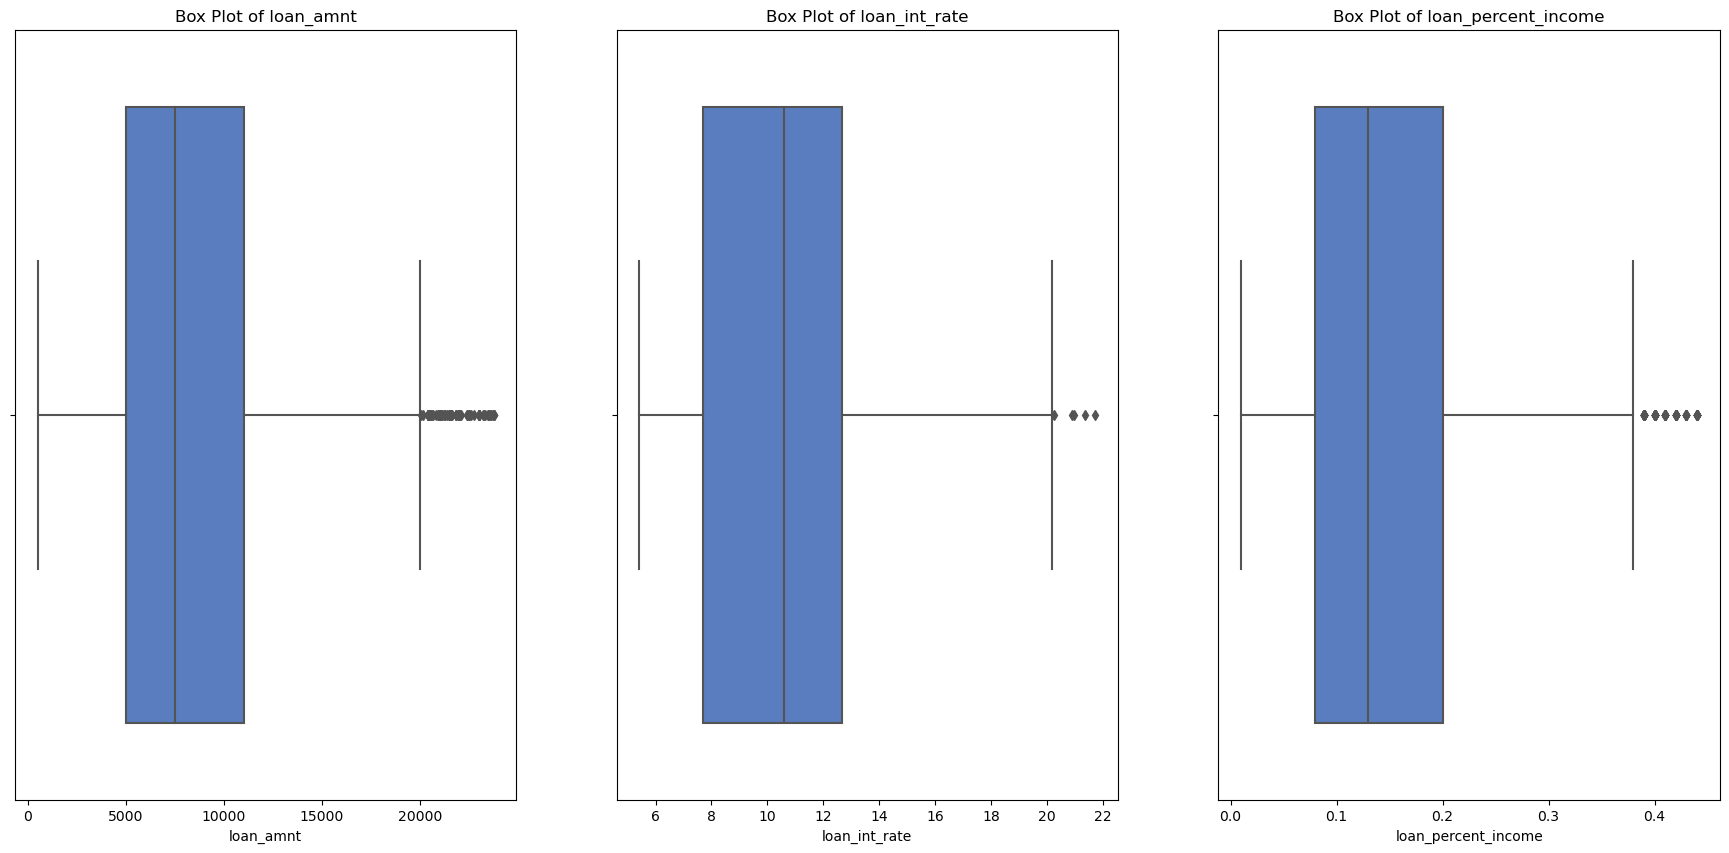

In [34]:
plt.figure(figsize=(22, 10))

plt.subplot(1,3,1)
sns.boxplot(x=df['loan_amnt'],palette = ("muted"))
plt.title('Box Plot of loan_amnt')
plt.xlabel('loan_amnt')

plt.subplot(1,3,2)
sns.boxplot(x=df['loan_int_rate'] ,palette = ("muted"))
plt.title('Box Plot of loan_int_rate')
plt.xlabel('loan_int_rate')

plt.subplot(1,3,3)
sns.boxplot(x=df['loan_percent_income'],palette = ("muted"))
plt.title('Box Plot of loan_percent_income')
plt.xlabel('loan_percent_income')

plt.show()

In [35]:
df_num = df.select_dtypes(include='number')

In [36]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [37]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [38]:
df.shape

(18180, 11)

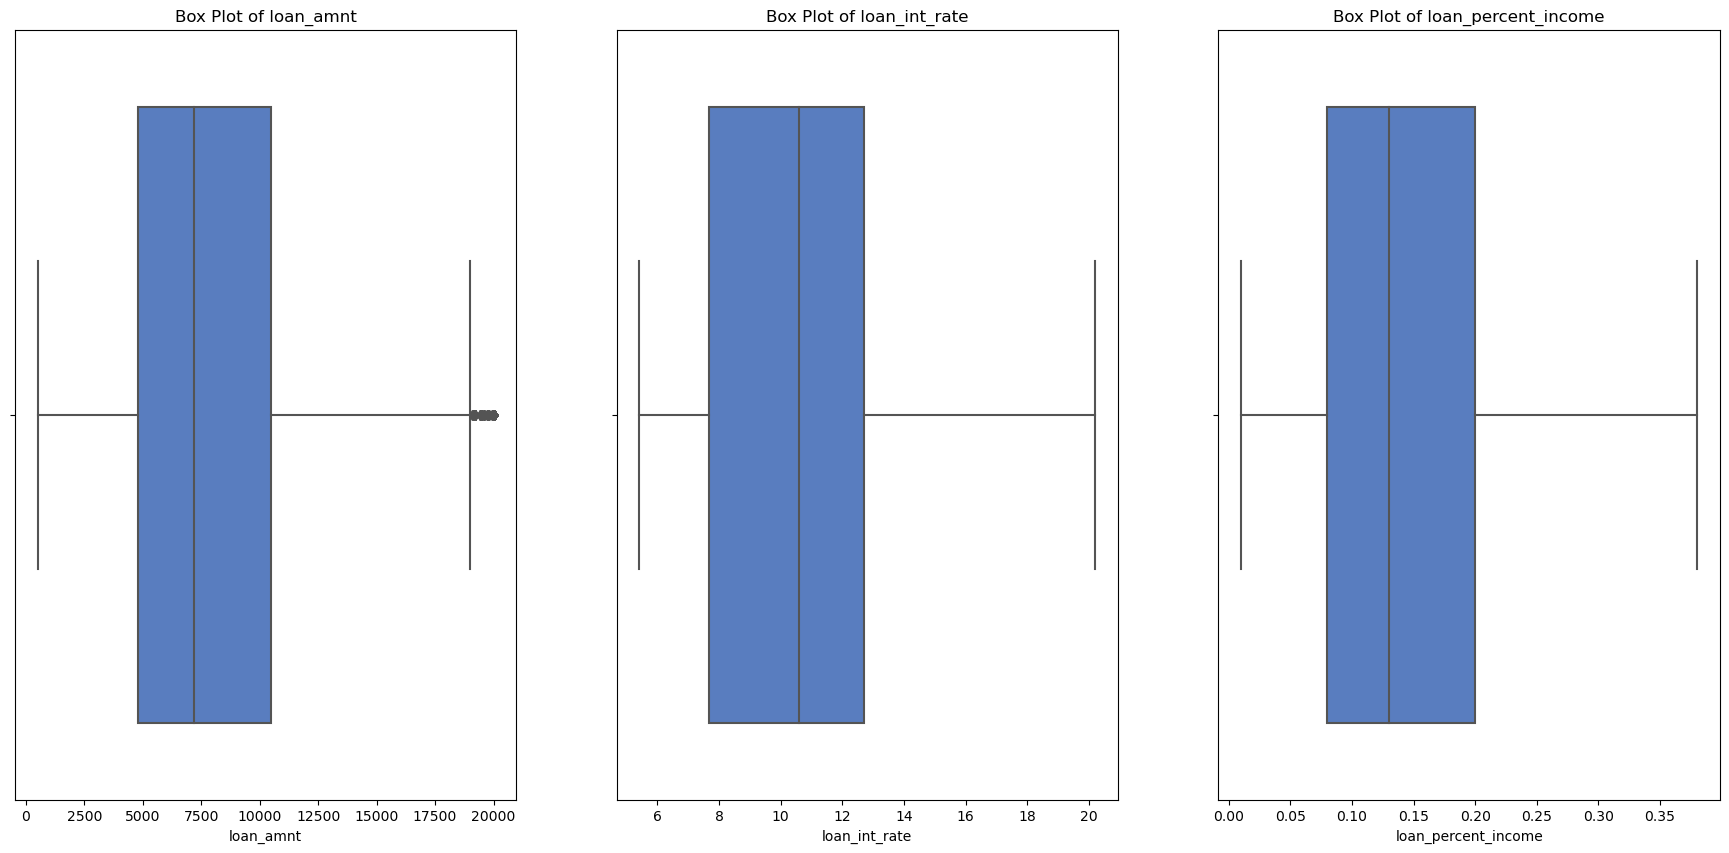

In [39]:
plt.figure(figsize=(22, 10))

plt.subplot(1,3,1)
sns.boxplot(x=df['loan_amnt'],palette = ("muted"))
plt.title('Box Plot of loan_amnt')
plt.xlabel('loan_amnt')

plt.subplot(1,3,2)
sns.boxplot(x=df['loan_int_rate'] ,palette = ("muted"))
plt.title('Box Plot of loan_int_rate')
plt.xlabel('loan_int_rate')

plt.subplot(1,3,3)
sns.boxplot(x=df['loan_percent_income'],palette = ("muted"))
plt.title('Box Plot of loan_percent_income')
plt.xlabel('loan_percent_income')

plt.show()

####  After treating the outliers it is observed that most of the outliers are removed from out dataset.

In [40]:
X = df.drop('cb_person_default_on_file', axis=1)
y = df['cb_person_default_on_file']
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14
27,23,11000,OWN,0.0,PERSONAL,A,1400,9.32,0,0.13
65,22,12000,MORTGAGE,7.0,EDUCATION,D,1500,14.84,0,0.13
96,24,12360,OWN,2.0,MEDICAL,C,1600,13.57,0,0.13


In [41]:
X_num = X.select_dtypes('number')
X_cat = X.select_dtypes('object')

#### Scaling Numerical Data

In [42]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [43]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

#### Encoding Categorical data

In [44]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  

In [45]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [46]:
from sklearn import preprocessing


#### Label encoding

In [47]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
y_encoded= label_encoder.fit_transform(y)
  


In [48]:
y = pd.DataFrame(y_encoded)

In [49]:
y.head()

,0
0,0
1,0
2,0
3,1
4,0


#### Train test split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.neighbors import KNeighborsClassifier


## KNN Classification

In [52]:
Knn_model = KNeighborsClassifier(n_neighbors=5)
Knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
knntrain_pred = Knn_model.predict(X_train)

In [54]:
from sklearn.metrics import f1_score


In [55]:
print("F-1 Score on train dataset:",f1_score(y_train,knntrain_pred))

F-1 Score on train dataset: 0.6971141781681304


In [56]:
knntest_pred = Knn_model.predict(X_test)
print("F-1 Score on test dataset:",f1_score(y_test,knntest_pred))


F-1 Score on test dataset: 0.5069380203515264


In [71]:
from sklearn.metrics import confusion_matrix, roc_auc_score 

### Confusion Matrix- KNN  (Train)

<Axes: >

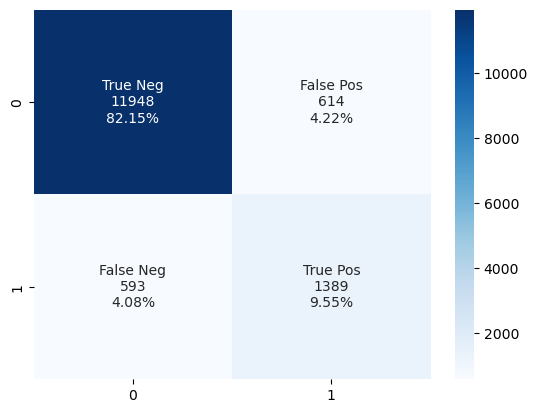

In [72]:
cf_matrix = confusion_matrix(y_train,knntrain_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

####  Confusion matrix for train data shows that the model is performing adequatly in predicting whether are person is loan defaulter or not.

### Confusion Matrix- KNN  (Test)

<Axes: >

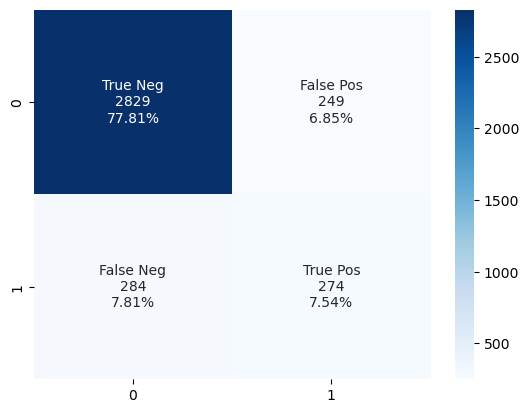

In [73]:
cf_matrix = confusion_matrix(y_test,knntest_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

####  Confusion matrix for test data shows that the model is performing adequatly in test data predicting whether are person is loan defaulter or not, 


## Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
modelLogistic = LogisticRegression(C=1,class_weight={0:1,1:2.0})
modelLogistic.fit(X_train,y_train)
#print the regression coefficients

print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient are = ", modelLogistic.coef_)

The intercept b0=  [-1.81302849]
The coefficient are =  [[-0.07265693  0.07146694 -0.20716047  0.16628962  0.64456016  0.
  -0.49542539 -0.09434546  0.24073526 -0.10161349 -0.04965199 -0.15034692
  -0.109922    0.11746222  0.00909725  0.05899402  0.06983977 -5.04378734
  -5.05937755  2.42661912  2.31787252  2.00791648  2.2469352   1.0989459 ]]


In [75]:
y_pred_train= modelLogistic.predict(X_train)

In [76]:
y_pred_test= modelLogistic.predict(X_test)

In [77]:
print("F-1 score for Train dataset",f1_score(y_train,y_pred_train))

F-1 score for Train dataset 0.666891095775122


In [78]:
print("F-1 score for Test dataset",f1_score(y_test,y_pred_test))

F-1 score for Test dataset 0.6940298507462687


### Confusion Matrix- Logistic  (Train)

<Axes: >

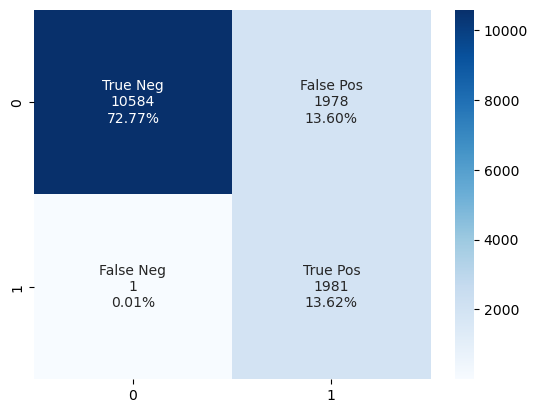

In [79]:
cf_matrix = confusion_matrix(y_train,y_pred_train)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

####  Confusion matrix for Train data shows that the model is performing adequatly in predicting whether are person is loan defaulter or not , very less false negatives are observed. 


### Confusion Matrix- Logistic  (Test)

<Axes: >

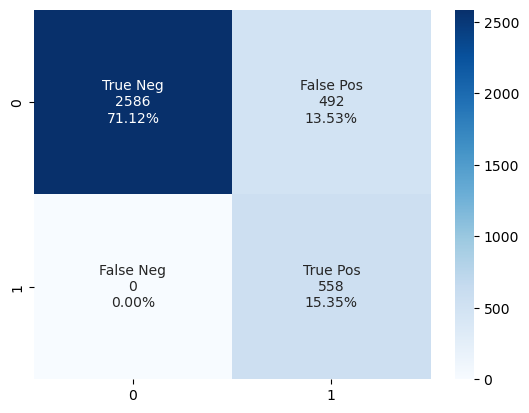

In [80]:
cf_matrix = confusion_matrix(y_test,y_pred_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

####  Confusion matrix for test data shows that the model is performing adequatly in predicting whether are person is loan defaulter or not , here also no negatives are observed. 


## Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dt = DecisionTreeClassifier(max_depth=20,class_weight= {0:1,1:2.2})
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 2.2}, max_depth=20)

In [83]:
preddt_train = dt.predict(X_train)

In [84]:
preddt_test = dt.predict(X_test)

In [85]:
print("F-1 score for Train dataset",f1_score(y_train,preddt_train))

F-1 score for Train dataset 0.9003007170946102


In [86]:
print("F-1 score for Test dataset",f1_score(y_test,preddt_test))

F-1 score for Test dataset 0.5520833333333334


### Confusion Matrix- DT  (Train)

<Axes: >

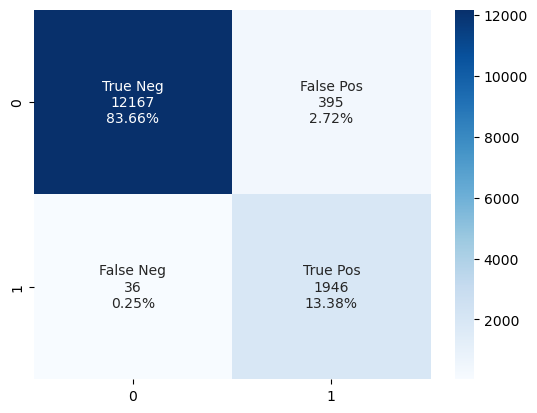

In [87]:
cf_matrix = confusion_matrix(y_train,preddt_train)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

####  Confusion matrix for Train data shows that the model is performing adequatly in predicting whether are person is loan defaulter or not , very less false negatives are observed. 


### Confusion Matrix- DT  (Test)

<Axes: >

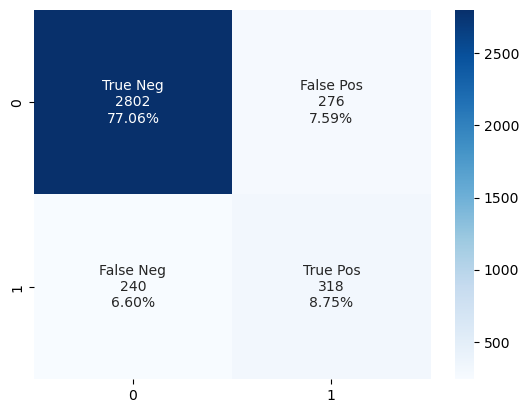

In [88]:
cf_matrix = confusion_matrix(y_test,preddt_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


####  Confusion matrix for Test data shows that the model is performing adequatly in predicting whether are person is loan defaulter or not. 


In [94]:
# auc scores
auc_score1 = roc_auc_score(y_test, knntest_pred)
auc_score2 = roc_auc_score(y_test, y_pred_test)
auc_score3 = roc_auc_score(y_test, preddt_test)

print(auc_score1, auc_score2,auc_score3)

0.7073353354138385 0.9232578248806055 0.7400965298473154


In [95]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, knntest_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_test, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, preddt_test, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

## Comparing KNN, Logistic and Decision Tree ROC curve

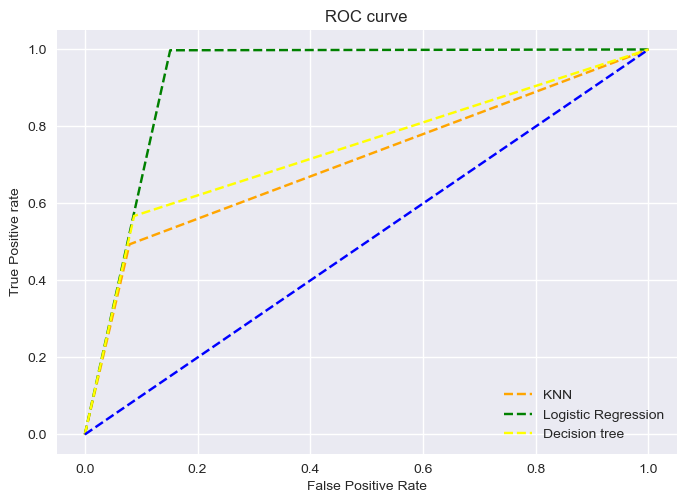

In [97]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Decision tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### The above graph shows ROC curve for all 3 models , i.e, KNN, Logistic Regression and decision tree.
#### It is observed that on test dataset Logistic regression is performing better as compared to other models, the AUROC for logistic regression is observed highest.